In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#df = df.drop(['Id'], axis=1)
df = pd.read_csv('owid-covid-data.csv')
df 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156313,ZWE,Africa,Zimbabwe,2022-01-17,226460.0,382.0,494.286,5258.0,11.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156314,ZWE,Africa,Zimbabwe,2022-01-18,226460.0,0.0,494.286,5258.0,0.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156315,ZWE,Africa,Zimbabwe,2022-01-19,226887.0,427.0,350.571,5266.0,8.0,7.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156316,ZWE,Africa,Zimbabwe,2022-01-20,227552.0,665.0,352.571,5276.0,10.0,7.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156318 entries, 0 to 156317
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    156318 non-null  object 
 1   continent                                   146921 non-null  object 
 2   location                                    156318 non-null  object 
 3   date                                        156318 non-null  object 
 4   total_cases                                 153486 non-null  float64
 5   new_cases                                   153447 non-null  float64
 6   new_cases_smoothed                          152296 non-null  float64
 7   total_deaths                                136074 non-null  float64
 8   new_deaths                                  136244 non-null  float64
 9   new_deaths_smoothed                         136112 non-null  float64
 

In [8]:
data = df.loc[:,['life_expectancy','human_development_index','total_cases','total_deaths','location']].dropna()
data

,life_expectancy,human_development_index,total_cases,total_deaths,location
28,64.83,0.511,40.0,1.0,Afghanistan
29,64.83,0.511,42.0,1.0,Afghanistan
30,64.83,0.511,74.0,1.0,Afghanistan
31,64.83,0.511,80.0,2.0,Afghanistan
32,64.83,0.511,91.0,2.0,Afghanistan
...,...,...,...,...,...
156313,61.49,0.571,226460.0,5258.0,Zimbabwe
156314,61.49,0.571,226460.0,5258.0,Zimbabwe
156315,61.49,0.571,226887.0,5266.0,Zimbabwe
156316,61.49,0.571,227552.0,5276.0,Zimbabwe


In [9]:
# 10 Countries in AEC
#ms = data.loc[data['location'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])].dropna()
ms = data.loc[data['location'].isin(['United States','China'])].dropna()
ms

,life_expectancy,human_development_index,total_cases,total_deaths,location
29654,76.91,0.761,547.0,17.0,China
29655,76.91,0.761,639.0,18.0,China
29656,76.91,0.761,916.0,26.0,China
29657,76.91,0.761,1399.0,42.0,China
29658,76.91,0.761,2062.0,56.0,China
...,...,...,...,...,...
148499,78.86,0.926,66590148.0,852532.0,United States
148500,78.86,0.926,67693339.0,854700.0,United States
148501,78.86,0.926,68684431.0,858510.0,United States
148502,78.86,0.926,69329860.0,860989.0,United States


In [10]:
ms.describe()

,life_expectancy,human_development_index,total_cases,total_deaths
count,1424.000000,1424.000000,1.424000e+03,1424.000000
mean,77.858982,0.841298,1.149130e+07,205239.943118
std,0.974995,0.082500,1.712986e+07,274695.057547
min,76.910000,0.761000,2.500000e+01,1.000000
25%,76.910000,0.761000,8.677525e+04,4634.000000
50%,76.910000,0.761000,9.933400e+04,4636.000000
75%,78.860000,0.926000,2.626107e+07,446940.250000
max,78.860000,0.926000,7.020984e+07,864556.000000


In [11]:
ms.isnull().sum()

life_expectancy            0
human_development_index    0
total_cases                0
total_deaths               0
location                   0
dtype: int64

##### การแบ่งข้อมูลให้เป็น Features และ Class โดยกำหนดให้ Features เก็บไว้ในตัวแปร X และ Class เก็บไว้ในตัวแปร y

In [12]:
X = ms.iloc[:, :-1]
y = ms.iloc[:, -1]

X, y 

(        life_expectancy  human_development_index  total_cases  total_deaths
 29654             76.91                    0.761        547.0          17.0
 29655             76.91                    0.761        639.0          18.0
 29656             76.91                    0.761        916.0          26.0
 29657             76.91                    0.761       1399.0          42.0
 29658             76.91                    0.761       2062.0          56.0
 ...                 ...                      ...          ...           ...
 148499            78.86                    0.926   66590148.0      852532.0
 148500            78.86                    0.926   67693339.0      854700.0
 148501            78.86                    0.926   68684431.0      858510.0
 148502            78.86                    0.926   69329860.0      860989.0
 148503            78.86                    0.926   70209840.0      864556.0
 
 [1424 rows x 4 columns],
 29654             China
 29655             Chin

##### StandardScaler คือการปรับค่า Features ให้เป็นสเกลเดียวกัน ในกรณีที่ข้อมูลที่มีหน่วยแตกต่างกัน เช่น ความสูง: หน่วยเป็นเซนติเมตร น้ำหนัก: หน่วยเป็นกิโลกรัม จะต้องปรับสเกลข้อมูลให้ min max เป็น 0-1 คือข้อมูลค่าเฉลี่ยจะเป็น 0 และส่วนเบี่ยงเบนตามฐานจะเป็น 1 (mean=0, SD=1)  

In [13]:
#การแปลงข้อมูลให้เป็น Standard scale  
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

X_sc.reshape(-1,1)

array([[-0.97366135],
       [-0.97366135],
       [-0.67103824],
       ...,
       [ 1.02705115],
       [ 3.42905215],
       [ 2.40101765]])

##### pd.factorize() ฟังก์ชันแปลงข้อมูล class ให้เป็นตัวเลข

In [14]:
y, class_names = pd.factorize(y) #ms['location'])

y, class_names

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['China', 'United States'], dtype='object'))

##### train_test_split การแบ่งข้อมูลเพื่อการ train และ test 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, shuffle=True) #random_state=48)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1139, 4), (285, 4), (1139,), (285,))

In [16]:
X_train, X_test, y_train, y_test 

(array([[-0.97366135, -0.97366135, -0.66573096, -0.73053523],
        [ 1.02705115,  1.02705115, -0.2504556 ,  0.00257852],
        [ 1.02705115,  1.02705115,  0.74619222,  0.73128583],
        ...,
        [-0.97366135, -0.97366135, -0.66619061, -0.73054251],
        [-0.97366135, -0.97366135, -0.66583982, -0.73053523],
        [ 1.02705115,  1.02705115,  1.04890615,  1.19363344]]),
 array([[ 1.02705115,  1.02705115,  1.97403718,  1.92347331],
        [-0.97366135, -0.97366135, -0.66608281, -0.73054251],
        [-0.97366135, -0.97366135, -0.66608935, -0.73054251],
        ...,
        [-0.97366135, -0.97366135, -0.66528392, -0.73053523],
        [-0.97366135, -0.97366135, -0.66634128, -0.73558624],
        [ 1.02705115,  1.02705115,  1.54001234,  1.54160682]]),
 array([0, 1, 1, ..., 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 

##### One-Hot-Encoding การแปลงข้อมูล class/label ให้เป็นเลขฐาน 2 (binary คือ 0 และ 1)

In [17]:
# #One-hot-encoding การแปลง class/label ให้เป็นเลขฐาน 2 (binary คือ 0 และ 1)
# y_train = pd.get_dummies(y_train)
# y_test = pd.get_dummies(y_test)

# y_train.shape, y_test.shape

In [18]:
#one-hot-encoding การแปลง class/label ให้เป็นเลขฐาน 2 คือ 0 และ 1 อีกวิธีหนึ่ง 
import tensorflow as tf 
to_categorical = tf.keras.utils.to_categorical
from tensorflow.keras.utils import  to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape 



((1139, 2), (285, 2))

In [19]:
y_train, y_test 

(array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]], dtype=float32),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.]

##### การสร้างโมเดลเพื่อเทรน AI

In [20]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,466
Trainable params: 2,466
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, 
                    epochs = 50, batch_size=10, 
                    verbose=1, validation_split=0.25)
                    #validation_data=(X_test, y_test), shuffle=True)

Epoch 1/50
86/86 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.9321 - val_loss: 0.0900 - val_accuracy: 1.0000
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 9.0175e-04 - val_accuracy: 1.0000
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.7863e-04 - val_accuracy: 1.0000
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.7659e-04 - val_accuracy: 1.0000
Epoch 7/50
86/86 [==============================] - 0s 2ms/step - loss: 9.2256e-04 - accuracy: 1.0000 - val_loss: 1.7465e-04 - val_accuracy: 1.0000


##### model.evaluate() การปประเมินโมเดล

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.022358233626619e-07
Test accuracy 1.0


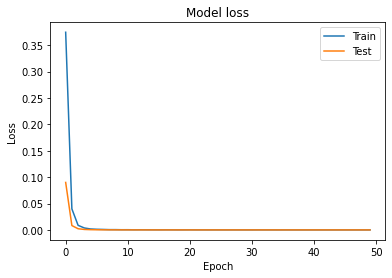

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

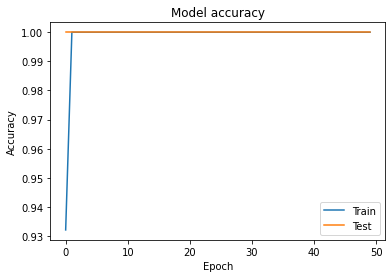

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [27]:
#threshold = 0.5 
y_pred = model.predict(X_test)
ypred = (y_pred > 0.5).astype(int)
predicted = pd.DataFrame(ypred)
rename = predicted.rename(columns={0: 'China',
                                   1: 'United States'})
rename


,China,United States
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
280,1,0
281,1,0
282,1,0
283,1,0


In [28]:
y_pred, predicted

(array([[2.21596475e-09, 1.00000000e+00],
        [1.00000000e+00, 1.47580526e-08],
        [1.00000000e+00, 1.47577426e-08],
        [1.00000000e+00, 1.47530423e-08],
        [1.01759161e-08, 1.00000000e+00],
        [1.00000000e+00, 1.47610644e-08],
        [1.94807050e-08, 1.00000000e+00],
        [1.37699230e-09, 1.00000000e+00],
        [7.39977324e-08, 1.00000000e+00],
        [1.00000000e+00, 1.47574051e-08],
        [1.34813352e-08, 1.00000000e+00],
        [2.20953797e-08, 1.00000000e+00],
        [1.55733471e-08, 1.00000000e+00],
        [1.00000000e+00, 1.47530423e-08],
        [2.62398525e-09, 1.00000000e+00],
        [1.00000000e+00, 1.47514667e-08],
        [4.42358356e-07, 9.99999523e-01],
        [8.75571782e-10, 1.00000000e+00],
        [8.05531108e-09, 1.00000000e+00],
        [1.14880381e-08, 1.00000000e+00],
        [1.00000000e+00, 1.47841979e-08],
        [2.63346408e-07, 9.99999583e-01],
        [1.69829576e-07, 9.99999762e-01],
        [1.00000000e+00, 1.4773514

In [29]:
ypred = np.argmax(y_pred, axis=1)
ypred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [30]:
ypred1 = pd.DataFrame(ypred)
ypred2 = ypred1.rename(columns={0:'class'})
ypred3 = class_names[ypred2]
ypred4 = pd.DataFrame(ypred3)
ypred5 = ypred4.rename(columns={0:'ข้อมูลพยากรณ์'})

ypred5

C:\Users\Techatach\AppData\Local\Temp\ipykernel_1796\14405894.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ypred3 = class_names[ypred2]


,ข้อมูลพยากรณ์
0,United States
1,China
2,China
3,China
4,United States
...,...
280,China
281,China
282,China
283,China


##### class_names[] ใช้กำหนด class ให้กับ y_test ซึ่ง class_names[] เป็นตัวแปรที่ใช้แปลงค่า class ที่เป็นชื่อประเทศ ให้เป็นตัวเลข (0,1,2,3...n) ด้วยฟังก์ชัน pd.factorize() เช่น  y, class_names = pd.factorize(y) ที่ได้แปลงค่าไว้แล้วตั้งแต่แรก
##### np.argmax() ฟังก์ชันใช้ตรวจสอบค่าความเชื่อมั่นว่า class ใดมีค่ามากที่สุด แล้วก็จะเลือก class นั้นมาเพียง class เดียวในแถวนั้น เช่น y_test2 แสดงผลเป็น array([0, 0, 5, ..., 7, 5, 5], dtype=int64)

In [31]:
ytest1 = np.argmax(y_test, axis=1)
ytest2 = (class_names[ytest1])
ytest3 = pd.DataFrame(ytest2)
ytest4 = ytest3.rename(columns={0:'ข้อมูลจริง'})

ytest4

,ข้อมูลจริง
0,United States
1,China
2,China
3,China
4,United States
...,...
280,China
281,China
282,China
283,China


In [32]:
stm = pd.concat([ytest4, ypred5], axis=1)
stm 

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,United States,United States
1,China,China
2,China,China
3,China,China
4,United States,United States
...,...,...
280,China,China
281,China,China
282,China,China
283,China,China


In [33]:
Xtest = pd.DataFrame(X_test)
df = Xtest.rename(columns={0: 'life_expectancy',
                             1: 'human_development_index',
                             2: 'total_cases',
                             3: 'total_deaths'})
df

,life_expectancy,human_development_index,total_cases,total_deaths
0,1.027051,1.027051,1.974037,1.923473
1,-0.973661,-0.973661,-0.666083,-0.730543
2,-0.973661,-0.973661,-0.666089,-0.730543
3,-0.973661,-0.973661,-0.666188,-0.730543
4,1.027051,1.027051,1.324477,1.468049
...,...,...,...,...
280,-0.973661,-0.973661,-0.666219,-0.730543
281,-0.973661,-0.973661,-0.666210,-0.730543
282,-0.973661,-0.973661,-0.665284,-0.730535
283,-0.973661,-0.973661,-0.666341,-0.735586


In [34]:
sum = pd.concat([df, stm], axis=1)
sum 

,life_expectancy,human_development_index,total_cases,total_deaths,ข้อมูลจริง,ข้อมูลพยากรณ์
0,1.027051,1.027051,1.974037,1.923473,United States,United States
1,-0.973661,-0.973661,-0.666083,-0.730543,China,China
2,-0.973661,-0.973661,-0.666089,-0.730543,China,China
3,-0.973661,-0.973661,-0.666188,-0.730543,China,China
4,1.027051,1.027051,1.324477,1.468049,United States,United States
...,...,...,...,...,...,...
280,-0.973661,-0.973661,-0.666219,-0.730543,China,China
281,-0.973661,-0.973661,-0.666210,-0.730543,China,China
282,-0.973661,-0.973661,-0.665284,-0.730535,China,China
283,-0.973661,-0.973661,-0.666341,-0.735586,China,China


##### การประเมิน model ด้วย mean_squared_error (MSE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), mean_absolute_error (MAE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), root mean_squared_error (RMSE: ค่าน้อยที่สุดเข้าใกล้ 0 เป็นค่าที่ดี), r2_score (R-squred: ค่าเข้าใกล้ 1 เป็นค่าที่ดี)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('% of accuracy:ค่าร้อยละของความแม่นยำ =', r2_score(y_test, y_pred))
print('MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ =',mean_absolute_error(y_test, y_pred))
print('MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', mean_squared_error(y_test, y_pred)) 
print('RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', np.sqrt(mean_squared_error(y_test, y_pred)))

% of accuracy:ค่าร้อยละของความแม่นยำ = 0.9999999999998548
MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ = 9.11908e-08
MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 3.615558e-14
RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 1.9014621e-07


##### การบันทึก model เอาไว้ใช้งาน 

In [36]:
model.save('datamodel.h5')
model.save('datamodel')

INFO:tensorflow:Assets written to: datamodel\assets


##### การโหลด model มาใช้งาน

In [37]:
#my_model.get_config()
from tensorflow.keras.models import load_model
datamodel = load_model('datamodel')

datamodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,466
Trainable params: 2,466
Non-trainable params: 0
_________________________________________________________________


In [38]:
new_model = load_model('datamodel.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,466
Trainable params: 2,466
Non-trainable params: 0
_________________________________________________________________


##### การนำโมเดลที่บันทึกไว้มา train ใหม่อีกครั้ง 

In [39]:
history = datamodel.fit(X_train, y_train, 
                    epochs=50, batch_size=10, 
                    verbose=1, validation_split=0.25,
                    shuffle=True) #validation_data=(X_test,y_test)

Epoch 1/50
86/86 [==============================] - 1s 3ms/step - loss: 2.2263e-06 - accuracy: 1.0000 - val_loss: 5.7217e-09 - val_accuracy: 1.0000
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 1.0534e-06 - accuracy: 1.0000 - val_loss: 1.5164e-09 - val_accuracy: 1.0000
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 2.3984e-07 - accuracy: 1.0000 - val_loss: 6.8215e-10 - val_accuracy: 1.0000
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 4.1601e-07 - accuracy: 1.0000 - val_loss: 1.7109e-10 - val_accuracy: 1.0000
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 1.3750e-07 - accuracy: 1.0000 - val_loss: 9.1818e-11 - val_accuracy: 1.0000
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 1.1402e-06 - accuracy: 1.0000 - val_loss: 2.0772e-11 - val_accuracy: 1.0000
Epoch 7/50
86/86 [==============================] - 0s 2ms/step - loss: 2.0402e-07 - accuracy: 1.0000 - val_loss

##### การบันทึก scaler และ class names

In [40]:
import pickle

pickle.dump(sc, open('scaler1.pkl', 'wb'))

##### การบันทึกเก็บข้อมูล class_names ชื่อประเทศในกลุ่มประเทศ AEC ที่นำมาใช้ในการศึกษา

In [41]:
file_name = 'classname1.pkl'

open_file = open(file_name, 'wb')
pickle.dump(class_names, open_file)
open_file.close()

##### การโหลด Scaler เพื่อนำมาใช้งาน

In [42]:
import pickle 
sc2 = pickle.load(open('./scaler1.pkl', 'rb'))

##### โหลด class_names ของกลุ่มประเทศ AEC 

In [43]:
file_name = 'classname1.pkl'

open_file = open(file_name, 'rb')
class_names = pickle.load(open_file)
open_file.close()
class_names

Index(['China', 'United States'], dtype='object')

##### การนำ model มาใช้งานต้องปรับข้อมูลให้เป็น StandardScale ดังนี้ 

In [44]:
X_input = sc2.fit_transform(X_test)
X_input

array([[ 1.06904497,  1.06904497,  2.23658767,  2.1268118 ],
       [-0.93541435, -0.93541435, -0.62904094, -0.69103208],
       [-0.93541435, -0.93541435, -0.62904804, -0.69103208],
       ...,
       [-0.93541435, -0.93541435, -0.62817381, -0.69102434],
       [-0.93541435, -0.93541435, -0.62932148, -0.69638714],
       [ 1.06904497,  1.06904497,  1.76549015,  1.72137331]])

In [88]:
y_pred1 = datamodel.predict(X_input).reshape(-1,1)
y_pd = (y_pred1 > 0.5).astype(int)
ypd = pd.DataFrame(y_pd)
ypd

,0
0,0
1,1
2,1
3,0
4,1
...,...
565,0
566,1
567,0
568,0


In [46]:
s = pd.DataFrame(class_names)
s.T

,0,1
0,China,United States


##### class_names[] ใช้กำหนด class ให้กับ y_test ซึ่ง class_names[] เป็นตัวแปรที่ใช้แปลงค่า class ที่เป็นชื่อประเทศ ให้เป็นตัวเลข (0,1,2,3...n) ด้วยฟังก์ชัน pd.factorize() เช่น  y, class_names = pd.factorize(y) ที่ได้แปลงค่าไว้แล้วตั้งแต่แรก
##### np.argmax() ฟังก์ชันใช้ตรวจสอบค่าความเชื่อมั่นว่า class ใดมีค่ามากที่สุด แล้วก็จะเลือก class นั้นมาเพียง class เดียวในแถวนั้น เช่น y_test2 แสดงผลเป็น array([0, 0, 5, ..., 7, 5, 5], dtype=int64)

In [47]:
ypred1 = np.argmax(y_pred1, axis=1)
ypred2 = pd.DataFrame(ypred1)
ypred3 = class_names[ypred2]
ypred4 = pd.DataFrame(ypred4)
ypred5 = ypred4.rename(columns={0:'ข้อมูลพยากรณ์'})
ypred5

C:\Users\Techatach\AppData\Local\Temp\ipykernel_1796\3961565435.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ypred3 = class_names[ypred2]


,ข้อมูลพยากรณ์
0,United States
1,China
2,China
3,China
4,United States
...,...
280,China
281,China
282,China
283,China


In [48]:
y_test1 = np.argmax(y_test, axis=1)
y_test2 = class_names[y_test1]
y_test3 = pd.DataFrame(y_test2)
df = y_test3.rename(columns={0:'ข้อมูลจริง'})
df 

,ข้อมูลจริง
0,United States
1,China
2,China
3,China
4,United States
...,...
280,China
281,China
282,China
283,China


In [49]:
total = pd.concat([df, ypred5], axis=1)
total 

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,United States,United States
1,China,China
2,China,China
3,China,China
4,United States,United States
...,...,...
280,China,China
281,China,China
282,China,China
283,China,China


In [50]:
ds = pd.DataFrame(X_test)
ds

,0,1,2,3
0,1.027051,1.027051,1.974037,1.923473
1,-0.973661,-0.973661,-0.666083,-0.730543
2,-0.973661,-0.973661,-0.666089,-0.730543
3,-0.973661,-0.973661,-0.666188,-0.730543
4,1.027051,1.027051,1.324477,1.468049
...,...,...,...,...
280,-0.973661,-0.973661,-0.666219,-0.730543
281,-0.973661,-0.973661,-0.666210,-0.730543
282,-0.973661,-0.973661,-0.665284,-0.730535
283,-0.973661,-0.973661,-0.666341,-0.735586


In [51]:
sum = pd.concat([ds, total], axis=1)
df = sum.rename(columns={0: 'life_expectancy',
                          1: 'human_development_index',
                          2: 'total_cases',
                          3: 'total_deaths'})
df

,life_expectancy,human_development_index,total_cases,total_deaths,ข้อมูลจริง,ข้อมูลพยากรณ์
0,1.027051,1.027051,1.974037,1.923473,United States,United States
1,-0.973661,-0.973661,-0.666083,-0.730543,China,China
2,-0.973661,-0.973661,-0.666089,-0.730543,China,China
3,-0.973661,-0.973661,-0.666188,-0.730543,China,China
4,1.027051,1.027051,1.324477,1.468049,United States,United States
...,...,...,...,...,...,...
280,-0.973661,-0.973661,-0.666219,-0.730543,China,China
281,-0.973661,-0.973661,-0.666210,-0.730543,China,China
282,-0.973661,-0.973661,-0.665284,-0.730535,China,China
283,-0.973661,-0.973661,-0.666341,-0.735586,China,China
